### Extracting results of robust prediction using all Type of RNN

Prediction using the said models  are done in [2021_2022_RNN_Robust_All_Models](2021_2022_RNN_Robust_All_Models.ipynb)


Using $vm_{pu}^{max} =1.025$

#### Import Modules 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pickle, sys, importlib,  time
import os
import joblib

In [3]:

function_folder = 'py_files/' 
# Add function folder to path if it is not already
if function_folder not in sys.path: sys.path.append(function_folder)

import oriFunctions as oriFc
from oriFunctions import network_folder, excel_folder, py_folder, Δt, attr_list

## Import Simulations results from [2021_2022_RNN_Robust_All_Models](2021_2022_RNN_Robust_All_Models.ipynb)

## Unique Models

In [9]:
fut_known = joblib.load('pickle_files/simulationResults/KnownFuture.pkl')
rnn_model1 = joblib.load('pickle_files/simulationResults/RNN_pred_res_Model1.pkl')
rnn_model2 = joblib.load('pickle_files/simulationResults/RNN_pred_res_Model2.pkl')
rnn_model3 = joblib.load('pickle_files/simulationResults/RNN_pred_res_Model3.pkl')


#### Concatanate Data into DF

In [16]:
vm_mu_max, vm_mu_min = 1.0250, 0.95  # Choosen 

# rnn3_vrise = fut_known['voltage_rise_df'][['No_Control']]

# rnn3_vrise.loc[rnn3['voltage_rise_df'].index] = rnn3['voltage_rise_df']
# rnn3_vrise.columns=['RNN3']


index_toUse = rnn_model1['P0100_concat_df'].index

p0100_df = pd.concat([fut_known['P0100_concat_df'].loc[index_toUse], 
                      rnn_model1['P0100_concat_df'].iloc[:,[1]],
                      rnn_model2['P0100_concat_df'].iloc[:,[1]],
                      rnn_model3['P0100_concat_df'].iloc[:,[1]] 
                     ], axis=1)


voltage_rise = pd.concat([fut_known['voltage_rise_df'].loc[index_toUse], 
                          rnn_model1['voltage_rise_df'],
                          rnn_model2['voltage_rise_df'], 
                          rnn_model3['voltage_rise_df']], axis=1)

### Voltage Rise Plot

#### Plot created Dataframe

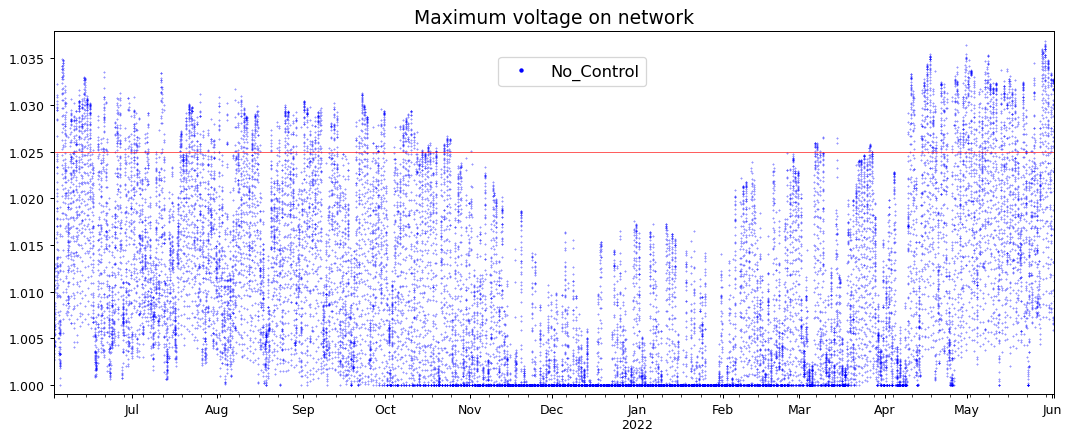

In [17]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[0]].plot(style= ['b.','k.'],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend( fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

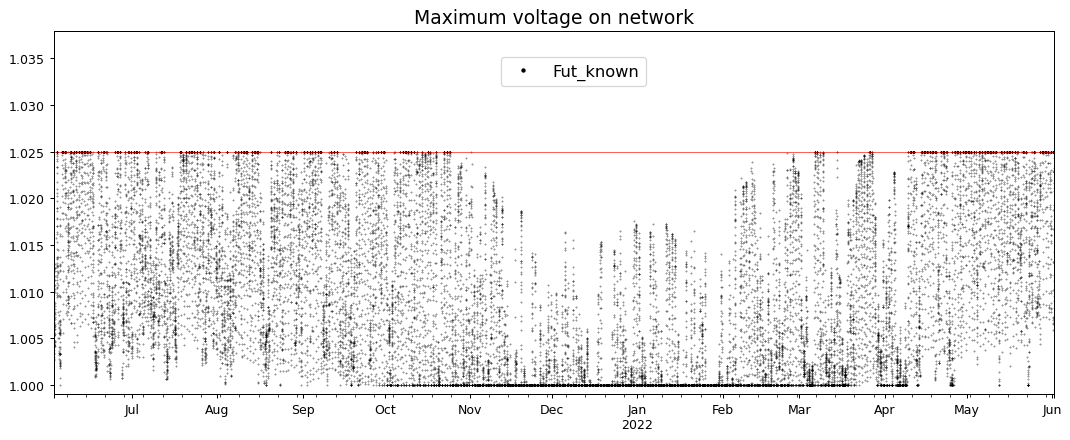

In [18]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[1]].plot(style= ['k.'],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend( fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

In [22]:
voltage_rise.columns

Index(['No_Control', 'Fut_known', 'RNN_Model1', 'Model2', 'Model3'], dtype='object')

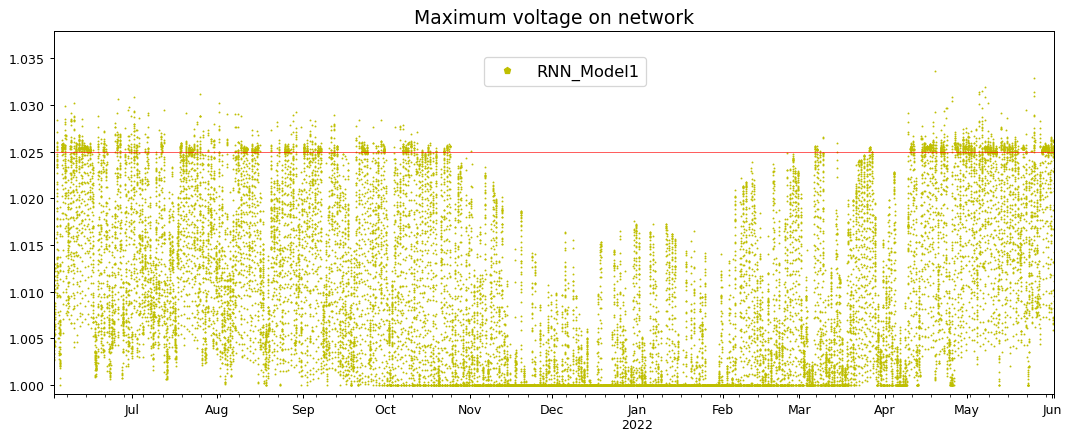

In [23]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[2]].plot(style= ['yp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

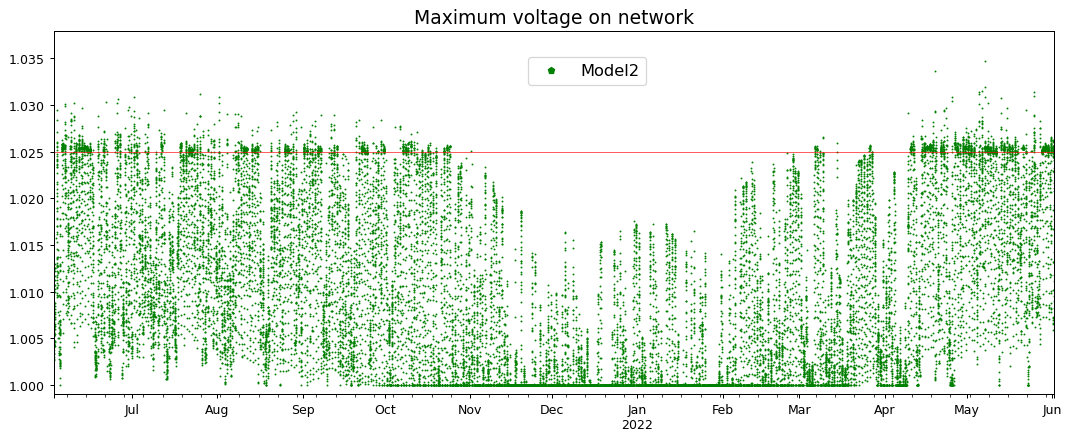

In [24]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[3]].plot(style= ['gp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

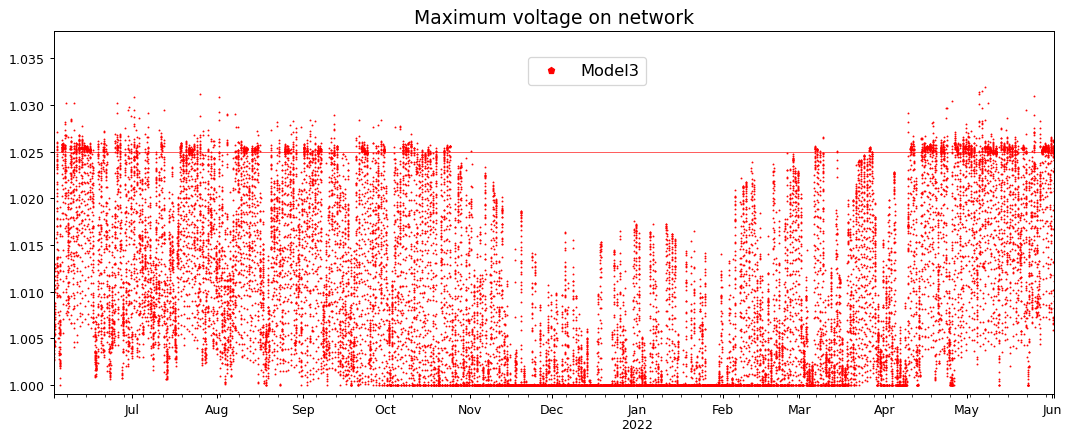

In [34]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_rise.iloc[:,[4]].plot(style= ['rp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

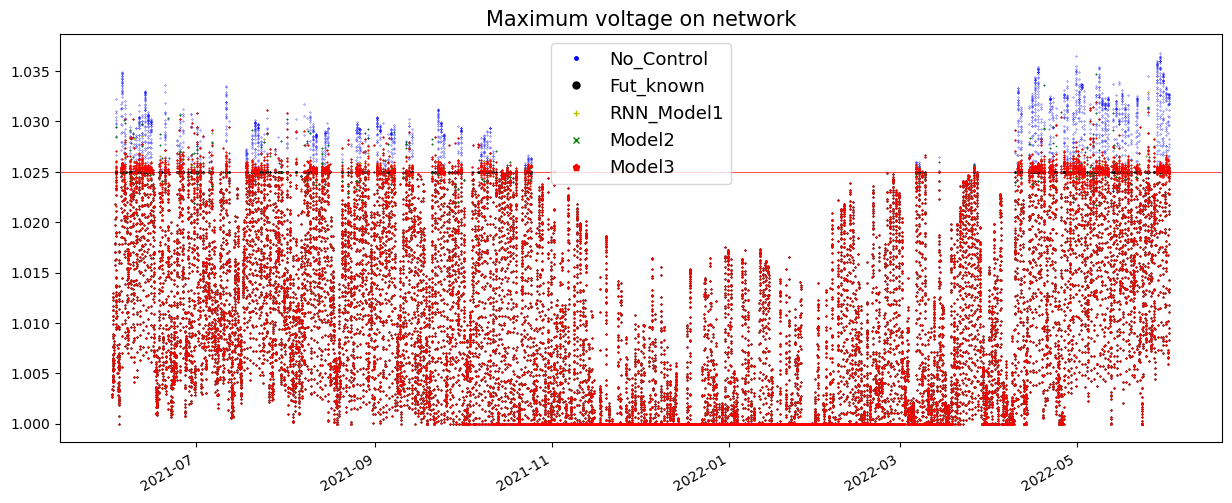

In [35]:
fig, axx = plt.subplots(figsize=(15,6), dpi=100)
plt.axhline(vm_mu_max,color='r', lw=0.5)

voltage_rise.plot(style= ['b.','ko','y+','gx','rp'],markersize=0.5, ax=axx)
plt.legend( fontsize=13, markerscale=10)
plt.title("Maximum voltage on network", fontsize=15);

### Voltage Rise above define threshold Plot

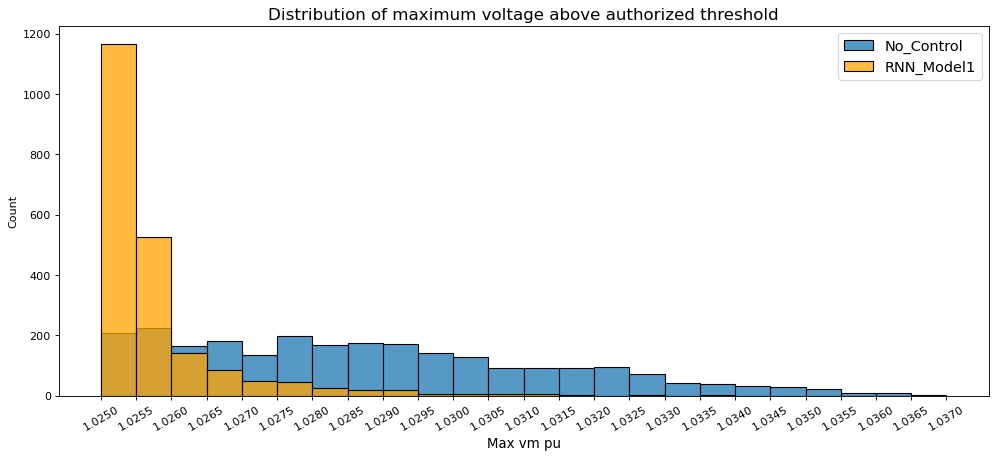

In [36]:
# Concatanate distribution data for the 
disdata = voltage_rise[voltage_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[0], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:blue',)
sbn.histplot(data = disdata, x=disdata.columns[2], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='orange',)

axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[0,2]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

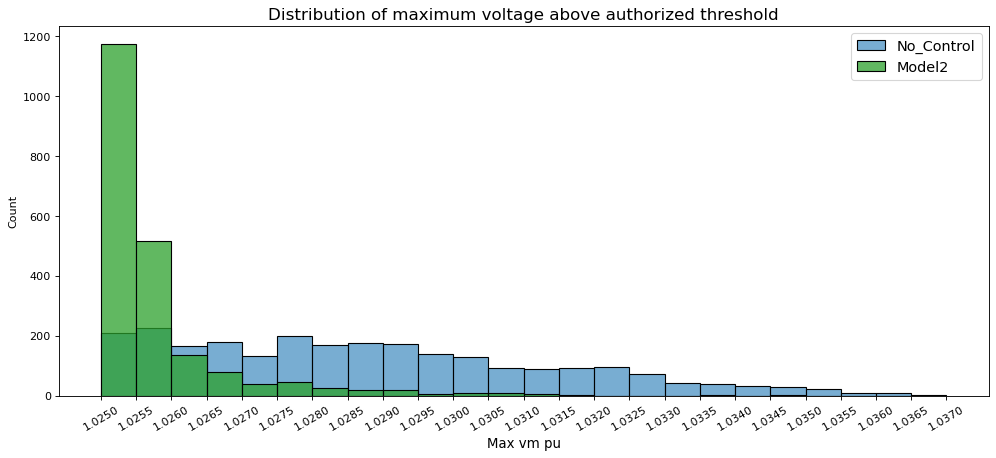

In [37]:
# Concatanate distribution data for the 
disdata = voltage_rise[voltage_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[0], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:blue', alpha=0.6)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)

axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[0,3]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

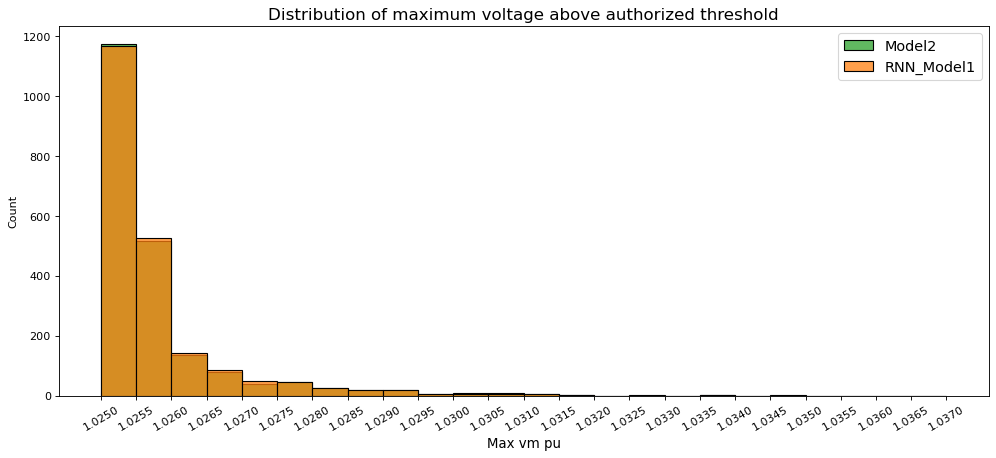

In [84]:
# Concatanate distribution data for the 
disdata = voltage_rise[voltage_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)
sbn.histplot(data = disdata, x=disdata.columns[2], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:orange',)


axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[3,2]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

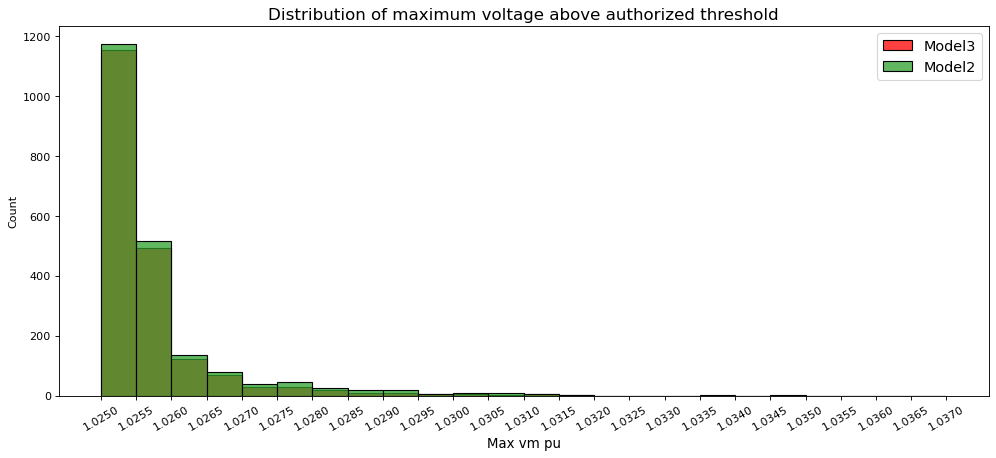

In [39]:
# Concatanate distribution data for the 
disdata = voltage_rise[voltage_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[4], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='red',)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)


axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[4,3]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

Text(0.5, 1.0, 'Multivariate Histogram of voltage rise above the authorised threshold')

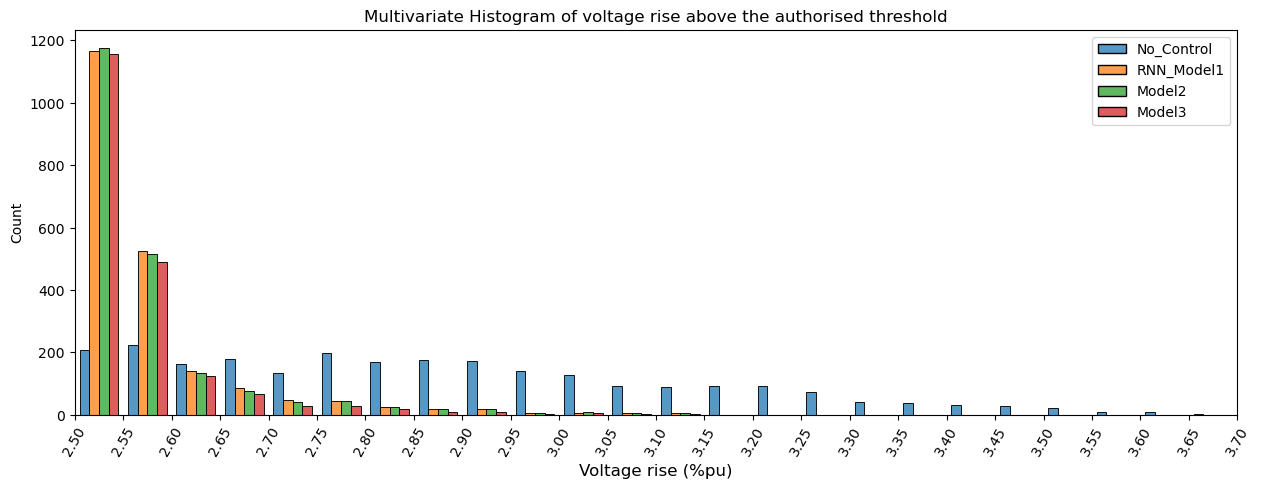

In [40]:
fig, axx = plt.subplots(figsize=(15,5), dpi=100)

nb_points = 25
laabel = [f'{elm:.2f}' for elm in np.linspace(2.50, 3.7, nb_points)]
tiicks = np.linspace(vm_mu_max, x_max_lim, nb_points)

sbn.histplot(disdata.iloc[:, [0,2,3, 4]], ax=axx, 
             bins=(nb_points-1), 
             binrange=(vm_mu_max ,x_max_lim),
             stat='count', multiple='dodge', shrink = 0.8, )

axx.set_xticks(tiicks, labels=laabel, rotation=60);
plt.xlabel('Voltage rise (%pu)',fontsize=12);
axx.set(xlim=(vm_mu_max,x_max_lim))
# fig.legend(handleheight=0.5)
# axx.semilogy()
plt.title('Multivariate Histogram of voltage rise above the authorised threshold')

### Energy and Power

<AxesSubplot:>

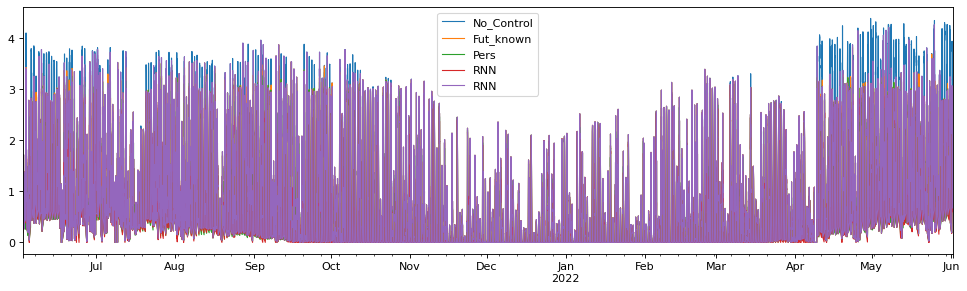

In [74]:
fig, axx = plt.subplots(figsize=(15,4), dpi=80)

p0100_df.plot(lw=1, ax=axx)

In [41]:
# Compute Energy
var_no_control, var_fut_known, var_model1, var_model2, var_model3 = p0100_df.sum()*Δt

print(f'P0100 prod,   No Control  : {var_no_control:.2f} MWh')
print(f'P0100 prod, Future known  : {var_fut_known:.2f} MWh |  Perc = {var_fut_known*100/var_no_control:.2f}%')
print(f'P0100 prod, RNN Model1    : {var_model1:.2f} MWh |  Perc = {var_model1*100/var_no_control:.2f}%')
print(f'P0100 prod, RNN Model2    : {var_model2:.2f} MWh |  Perc = {var_model2*100/var_no_control:.2f}%')
print(f'P0100 prod, RNN Model3    : {var_model3:.2f} MWh |  Perc = {var_model3*100/var_no_control:.2f}%')


P0100 prod,   No Control  : 5060.71 MWh
P0100 prod, Future known  : 4704.87 MWh |  Perc = 92.97%
P0100 prod, RNN Model1    : 4755.33 MWh |  Perc = 93.97%
P0100 prod, RNN Model2    : 4754.51 MWh |  Perc = 93.95%
P0100 prod, RNN Model3    : 4734.94 MWh |  Perc = 93.56%


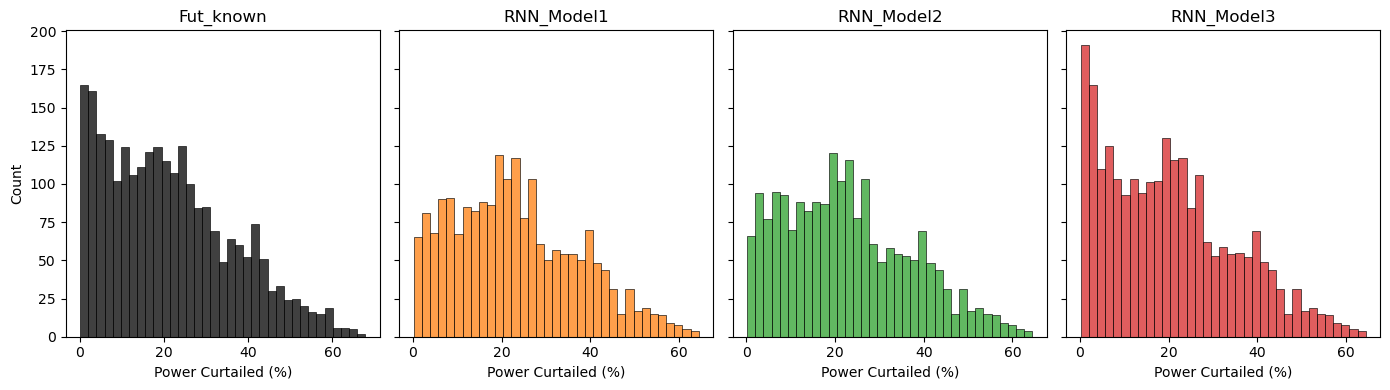

In [45]:
p0100_max = 4 # Maximum power of P0100
col_list = ['black', 'tab:orange', 'tab:green', 'tab:red']

fig, axx = plt.subplots(1,4, figsize=(14,4),sharey=True)

for ind, cur_ax in enumerate(axx.flatten()):
    
    var = (p0100_df.No_Control-p0100_df.iloc[:,ind+1])*100/p0100_max
    sbn.histplot(var[var>0.1].values, ax=cur_ax, color=col_list[ind], bins=35)
    if ind != 0 :
        cur_ax.set(ylabel='')
    cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_df.columns[ind+1], )

fig.tight_layout()

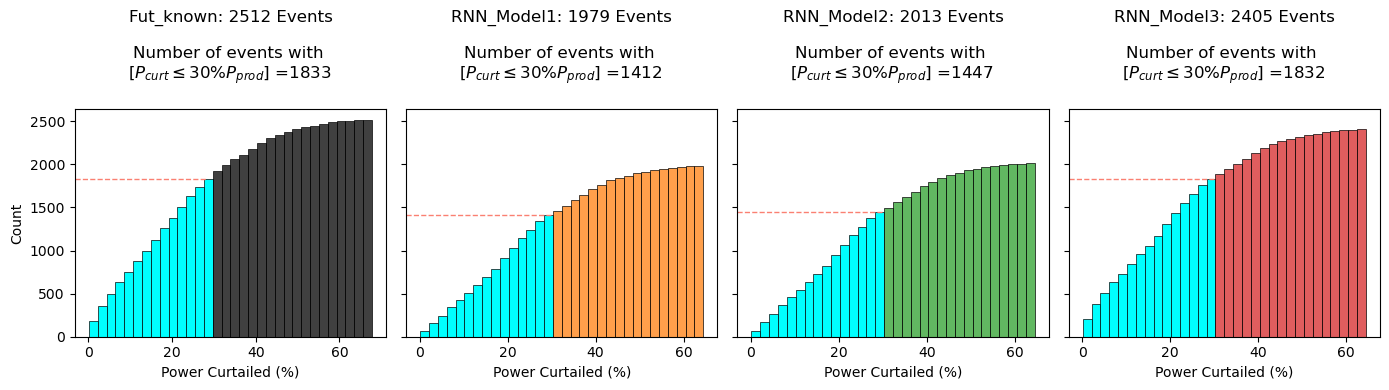

In [130]:
tot_bins = [32, 32, 32,32]
lenn = [65, 60, 60,60 ]
col_list = ['black', 'tab:orange', 'tab:green', 'tab:red']

fig, axx = plt.subplots(1,4, figsize=(14,4),sharey=True)

for ind, cur_ax in enumerate(axx.flatten()):
    
    var = abs(p0100_df.No_Control-p0100_df.iloc[:,ind+1])*100/p0100_max
    sbn.histplot(var[var>0.1].values, ax=cur_ax, color=col_list[ind], cumulative=True, bins=tot_bins[ind])
    if ind != 0 :
        cur_ax.set(ylabel='')
        perc = 15
        for elm in cur_ax.patches[:perc]: elm.set_facecolor('cyan')
        var1 = cur_ax.patches[perc-1].get_height()
        var2 = cur_ax.patches[-1].get_height()
        x_maxx = cur_ax.patches[perc-1].get_x()/lenn[ind]
        cur_ax.axhline(cur_ax.patches[perc-1].get_height(),xmax=x_maxx, color='salmon', ls='--', lw=1)
        cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_df.columns[ind+1]+f': {var2} Events\n\nNumber of events with \n[$P_{{curt}}\leq ${30}%$P_{{prod}}$] ={var1} \n')
    else: 
        perc=14
        for elm in cur_ax.patches[:perc]: elm.set_facecolor('cyan')
        var1 = cur_ax.patches[perc-1].get_height()
        var2 = cur_ax.patches[-1].get_height()
        x_maxx = cur_ax.patches[perc-1].get_x()/lenn[ind]
        cur_ax.axhline(cur_ax.patches[perc-1].get_height(),xmax=x_maxx, color='salmon', ls='--', lw=1)
        cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_df.columns[ind+1]+f': {var2} Events\n\nNumber of events with \n[$P_{{curt}}\leq ${30}%$P_{{prod}}$] ={var1} \n')
    
    
    # var2 = axx[1].patches[-1].get_height() - var1 
    
fig.tight_layout()

## Combined Models 

In [145]:
rnn_AtLeast1 = joblib.load('pickle_files/simulationResults/RNN_pred_res_AtLeast1Model.pkl')
rnn_AtLeast2 = joblib.load('pickle_files/simulationResults/RNN_pred_res_AtLeast2Model.pkl')
rnn_AtLeast3 = joblib.load('pickle_files/simulationResults/RNN_pred_res_AtLeast3Model.pkl')

#### Concatanate Data into DF

In [180]:

index_toUse = rnn_model1['P0100_concat_df'].index

p0100_comb_df = pd.concat([fut_known['P0100_concat_df'].loc[index_toUse], 
                      rnn_AtLeast1['P0100_concat_df'].iloc[:,[1]],
                      rnn_AtLeast2['P0100_concat_df'].iloc[:,[1]],
                      rnn_AtLeast3['P0100_concat_df'].iloc[:,[1]] 
                     ], axis=1)


voltage_comb_rise = pd.concat([fut_known['voltage_rise_df'].loc[index_toUse], 
                          rnn_AtLeast1['voltage_rise_df'],
                          rnn_AtLeast2['voltage_rise_df'], 
                          rnn_AtLeast3['voltage_rise_df']], axis=1)

### Voltage Rise Plot

#### Plot created Dataframe

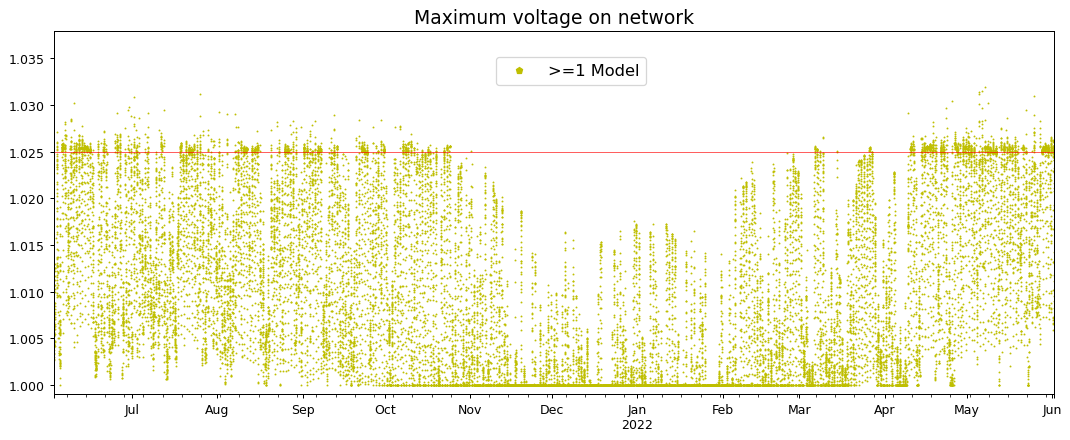

In [181]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_comb_rise.iloc[:,[2]].plot(style= ['yp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

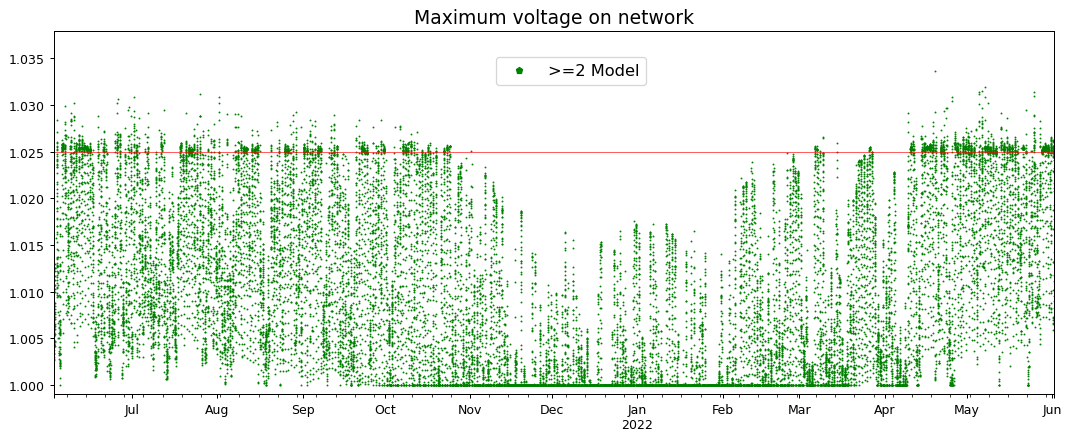

In [182]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_comb_rise.iloc[:,[3]].plot(style= ['gp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

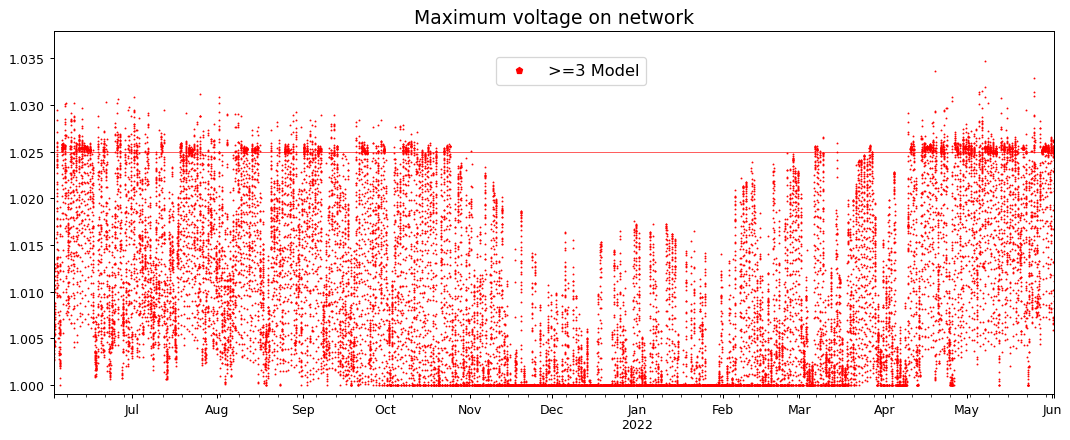

In [183]:
fig, axx = plt.subplots(figsize=(12,5), dpi=90)

voltage_comb_rise.iloc[:,[4]].plot(style= ['rp' ],markersize=0.5, ax=axx, legend=False)
plt.axhline(vm_mu_max,color='r', lw=0.5,)

plt.legend(fontsize=13, markerscale=10,bbox_to_anchor=(0.6,0.95) )
plt.title("Maximum voltage on network", fontsize=15);
plt.ylim((.999,1.038))
fig.tight_layout()
# fig.legend(['', 'dfdf'], )

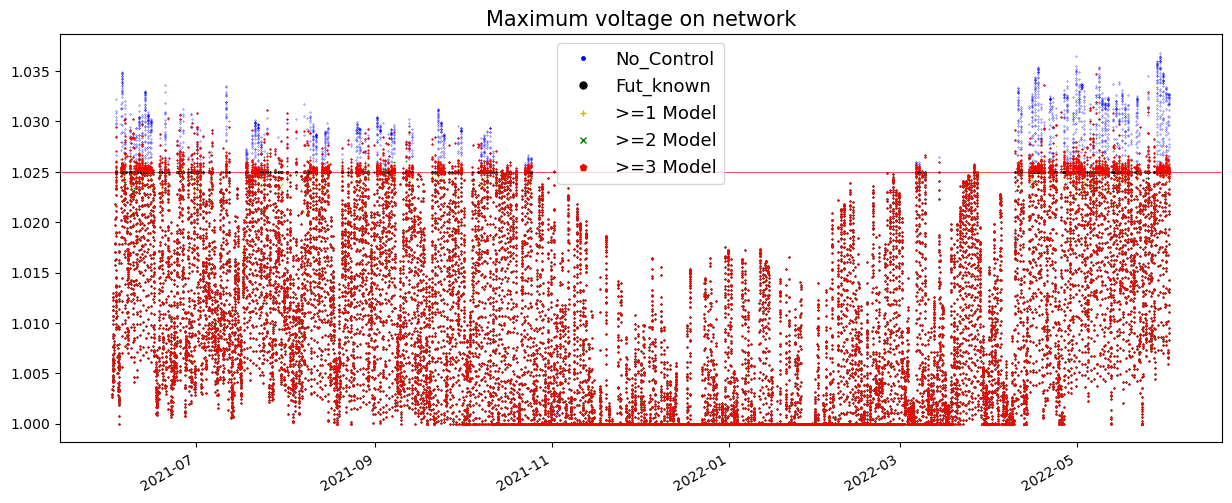

In [184]:
fig, axx = plt.subplots(figsize=(15,6), dpi=100)
plt.axhline(vm_mu_max,color='r', lw=0.5)

voltage_comb_rise.plot(style= ['b.','ko','y+','gx','rp'],markersize=0.5, ax=axx)
plt.legend( fontsize=13, markerscale=10)
plt.title("Maximum voltage on network", fontsize=15);

### Voltage Rise above define threshold Plot

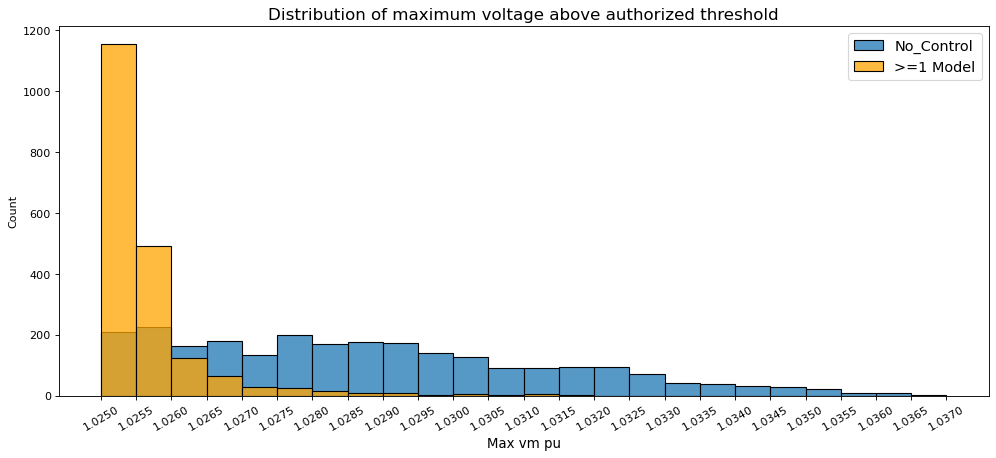

In [185]:
# Concatanate distribution data for the 
disdata = voltage_comb_rise[voltage_comb_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[0], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:blue',)
sbn.histplot(data = disdata, x=disdata.columns[2], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='orange',)

axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[0,2]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

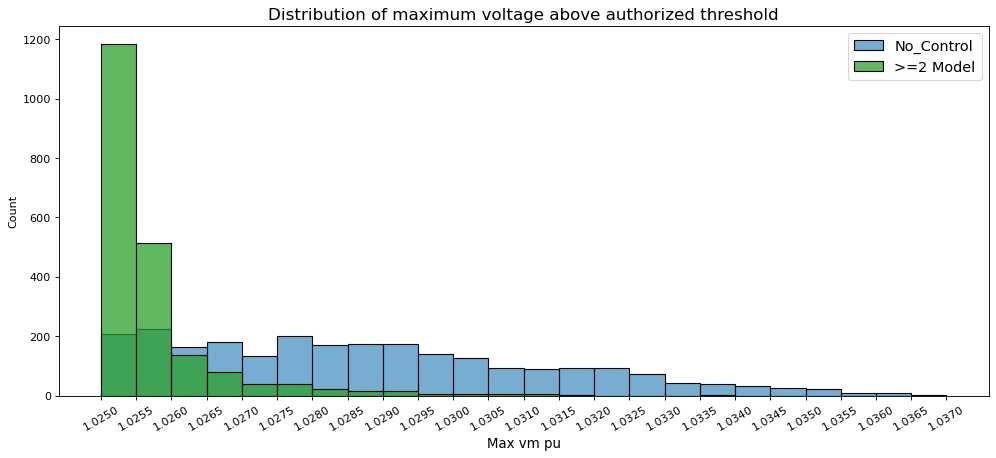

In [186]:
# Concatanate distribution data for the 
disdata = voltage_comb_rise[voltage_comb_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[0], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:blue', alpha=0.6)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)

axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[0,3]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

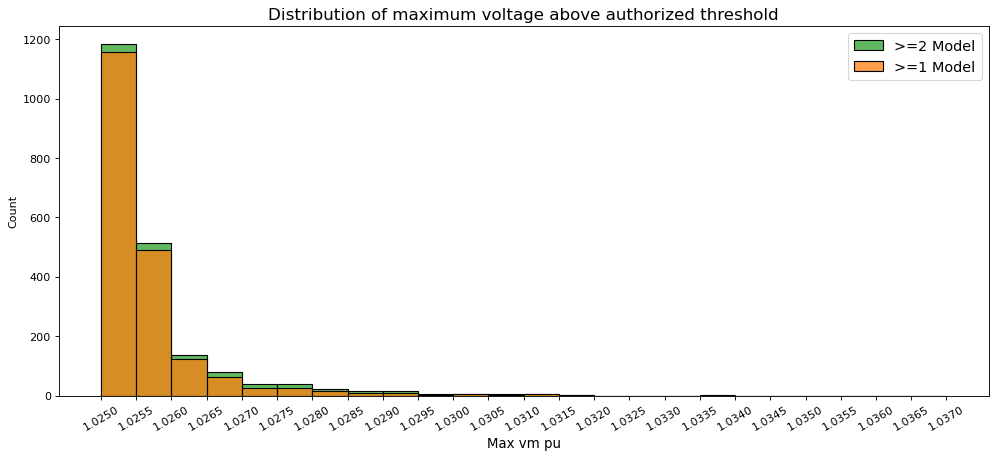

In [187]:
# Concatanate distribution data for the 
disdata = voltage_comb_rise[voltage_comb_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)
sbn.histplot(data = disdata, x=disdata.columns[2], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='tab:orange',)


axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[3,2]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

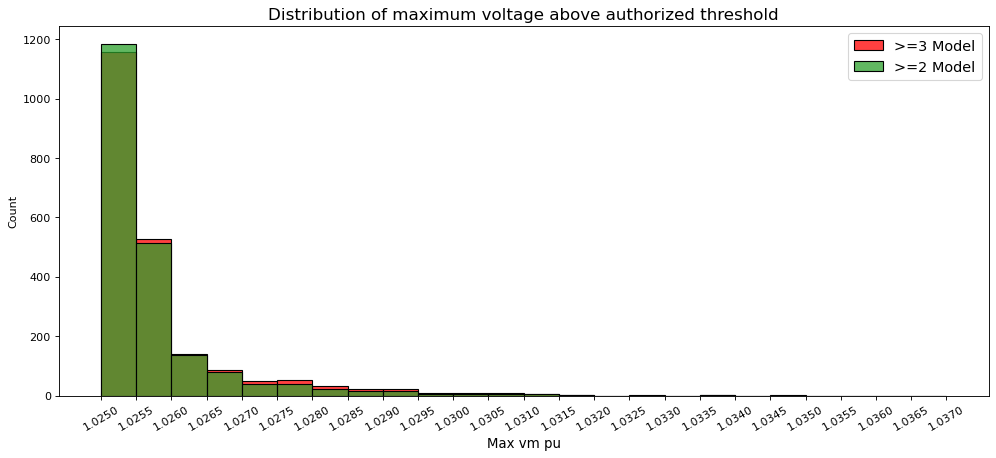

In [188]:
# Concatanate distribution data for the 
disdata = voltage_comb_rise[voltage_comb_rise>vm_mu_max]

x_max_lim = 1.0370
n_bins = len(np.arange(vm_mu_max, x_max_lim, 5e-4))-1
fig, axx = plt.subplots(figsize=(15,6), dpi=80)
sbn.histplot(data = disdata, x=disdata.columns[4], ax=axx, bins=n_bins, binrange=(vm_mu_max,x_max_lim), color='red',)
sbn.histplot(data = disdata, x=disdata.columns[3], ax=axx, bins=n_bins, binrange=(vm_mu_max, x_max_lim), color='tab:green',)


axx.set_xticks(np.arange(vm_mu_max, x_max_lim, 5e-4), labels=[f'{elm:.4f}' for elm in np.arange(vm_mu_max, x_max_lim, 5e-4)], rotation=30);
axx.set_xlabel('Max vm pu', size=12)
plt.legend(disdata.columns[[4,3]], fontsize=13)
plt.title('Distribution of maximum voltage above authorized threshold', fontsize=15);

Text(0.5, 1.0, 'Multivariate Histogram of voltage rise above the authorised threshold')

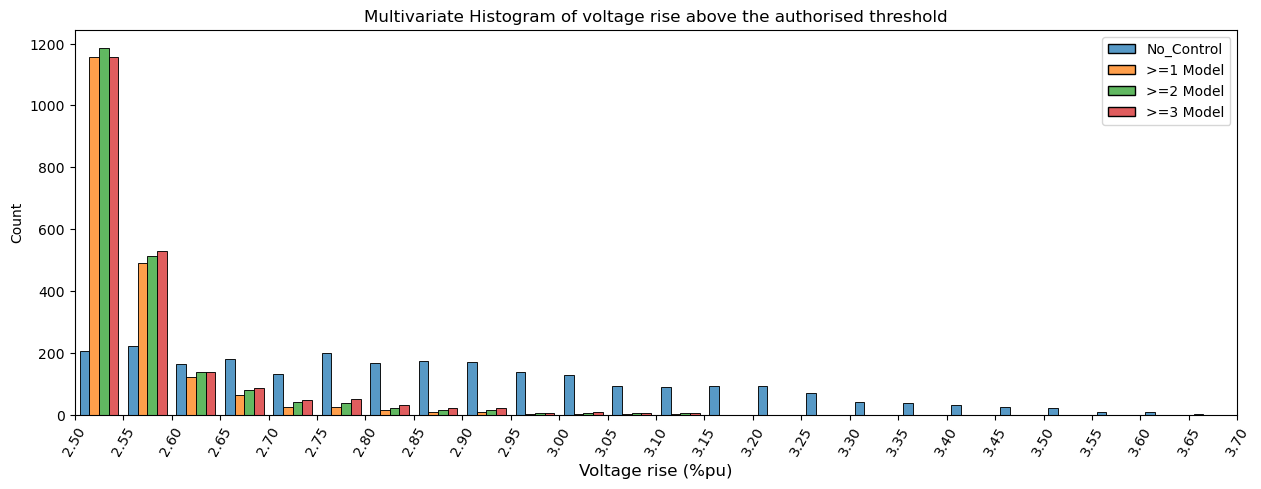

In [189]:
# disdata.columns = list(disdata.columns[:2])+['<'+a.split('>')[1] for a in disdata.columns[2:]]

fig, axx = plt.subplots(figsize=(15,5), dpi=100)

nb_points = 25
laabel = [f'{elm:.2f}' for elm in np.linspace(2.50, 3.7, nb_points)]
tiicks = np.linspace(vm_mu_max, x_max_lim, nb_points)

sbn.histplot(disdata.iloc[:, [0,2,3, 4]], ax=axx, 
             bins=(nb_points-1), 
             binrange=(vm_mu_max ,x_max_lim),
             stat='count', multiple='dodge', shrink = 0.8, )

axx.set_xticks(tiicks, labels=laabel, rotation=60);
plt.xlabel('Voltage rise (%pu)',fontsize=12);
axx.set(xlim=(vm_mu_max,x_max_lim))
# fig.legend(handleheight=0.5)
# axx.semilogy()
plt.title('Multivariate Histogram of voltage rise above the authorised threshold')

### Energy and Power

<AxesSubplot:>

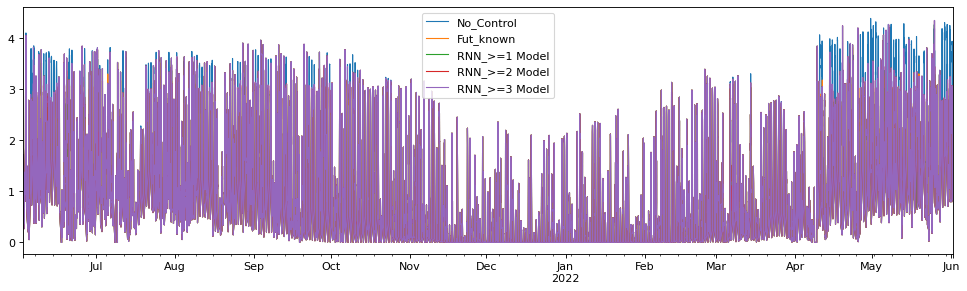

In [119]:
fig, axx = plt.subplots(figsize=(15,4), dpi=80)

p0100_comb_df.plot(lw=1, ax=axx)

In [178]:
# Compute Energy
var_no_control, var_fut_known, var_model1, var_model2, var_model3 = p0100_comb_df.sum()*Δt

print(f'P0100 prod,   No Control  : {var_no_control:.2f} MWh')
print(f'P0100 prod, Future known  : {var_fut_known:.2f} MWh |  Perc = {var_fut_known*100/var_no_control:.2f}%')
print(f'P0100 prod, AtL1 Model    : {var_model1:.2f} MWh |  Perc = {var_model1*100/var_no_control:.2f}%')
print(f'P0100 prod, AtL2 Models   : {var_model2:.2f} MWh |  Perc = {var_model2*100/var_no_control:.2f}%')
print(f'P0100 prod, AtL3 Model3   : {var_model3:.2f} MWh |  Perc = {var_model3*100/var_no_control:.2f}%')

P0100 prod,   No Control  : 5060.71 MWh
P0100 prod, Future known  : 4704.87 MWh |  Perc = 92.97%
P0100 prod, AtL1 Model    : 4732.02 MWh |  Perc = 93.51%
P0100 prod, AtL2 Models   : 4752.26 MWh |  Perc = 93.90%
P0100 prod, AtL3 Model3   : 4760.51 MWh |  Perc = 94.07%


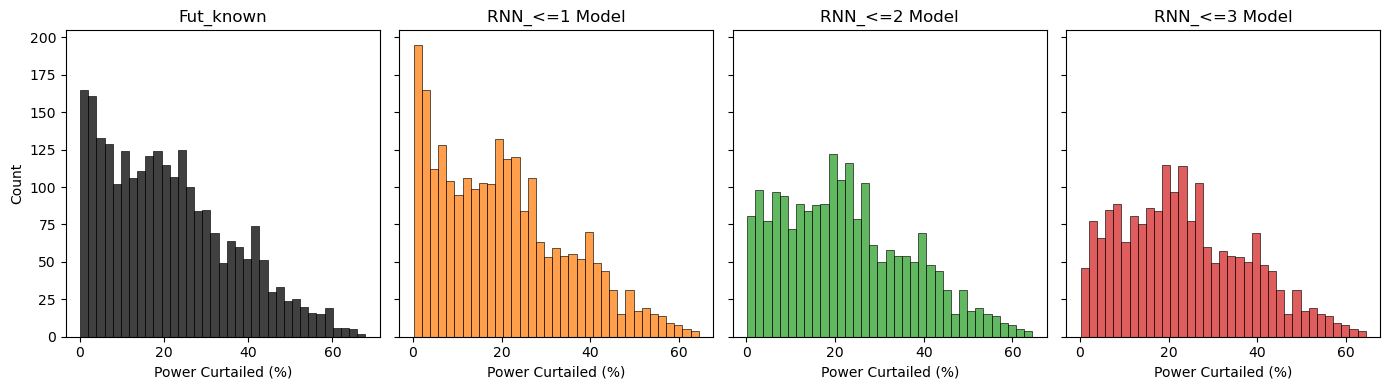

In [179]:
p0100_max = 4 # Maximum power of P0100
col_list = ['black', 'tab:orange', 'tab:green', 'tab:red']

# p0100_comb_df.columns = list(p0100_comb_df.columns[:2]) + [elm[0]+'<'+elm[1] 
#                                                            for elm in [a.split('>') 
#                                                                        for a in p0100_comb_df.columns[2:]]]
fig, axx = plt.subplots(1,4, figsize=(14,4),sharey=True)

for ind, cur_ax in enumerate(axx.flatten()):
    
    var = (p0100_comb_df.No_Control-p0100_comb_df.iloc[:,ind+1])*100/p0100_max
    sbn.histplot(var[var>0.1].values, ax=cur_ax, color=col_list[ind], bins=35)
    if ind != 0 :
        cur_ax.set(ylabel='')
    cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_comb_df.columns[ind+1], )

fig.tight_layout()

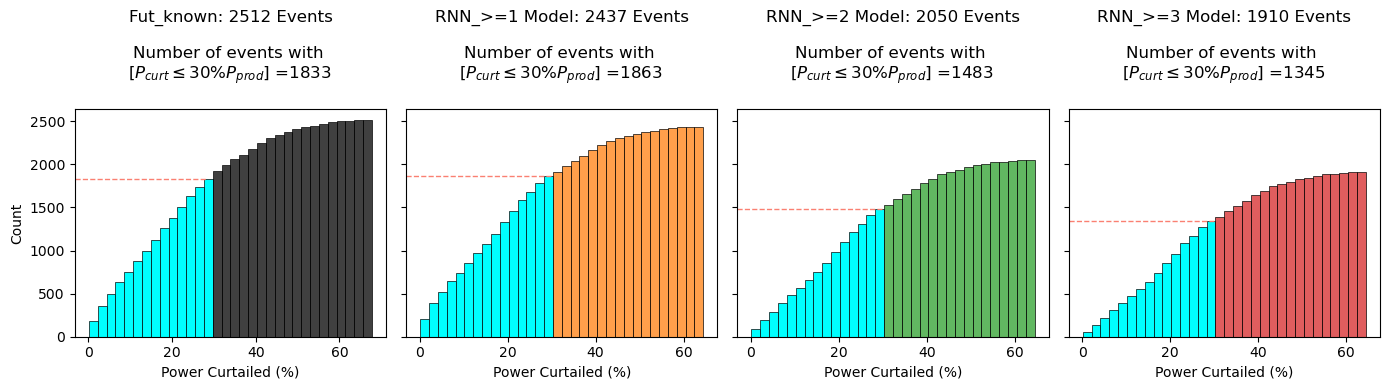

In [192]:
tot_bins = [32, 32, 32,32]
lenn = [65, 60, 60,60 ]
col_list = ['black', 'tab:orange', 'tab:green', 'tab:red']

fig, axx = plt.subplots(1,4, figsize=(14,4),sharey=True)

for ind, cur_ax in enumerate(axx.flatten()):
    
    var = abs(p0100_comb_df.No_Control-p0100_comb_df.iloc[:,ind+1])*100/p0100_max
    sbn.histplot(var[var>0.1].values, ax=cur_ax, color=col_list[ind], cumulative=True, bins=tot_bins[ind])
    if ind != 0 :
        cur_ax.set(ylabel='')
        perc = 15
        for elm in cur_ax.patches[:perc]: elm.set_facecolor('cyan')
        var1 = cur_ax.patches[perc-1].get_height()
        var2 = cur_ax.patches[-1].get_height()
        x_maxx = cur_ax.patches[perc-1].get_x()/lenn[ind]
        cur_ax.axhline(cur_ax.patches[perc-1].get_height(),xmax=x_maxx, color='salmon', ls='--', lw=1)
        cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_comb_df.columns[ind+1]+f': {var2} Events\n\nNumber of events with \n[$P_{{curt}}\leq ${30}%$P_{{prod}}$] ={var1} \n')
    else: 
        perc=14
        for elm in cur_ax.patches[:perc]: elm.set_facecolor('cyan')
        var1 = cur_ax.patches[perc-1].get_height()
        var2 = cur_ax.patches[-1].get_height()
        x_maxx = cur_ax.patches[perc-1].get_x()/lenn[ind]
        cur_ax.axhline(cur_ax.patches[perc-1].get_height(),xmax=x_maxx, color='salmon', ls='--', lw=1)
        cur_ax.set(xlabel='Power Curtailed (%)', title=p0100_comb_df.columns[ind+1]+f': {var2} Events\n\nNumber of events with \n[$P_{{curt}}\leq ${30}%$P_{{prod}}$] ={var1} \n')
    
    
    # var2 = axx[1].patches[-1].get_height() - var1 
    
fig.tight_layout()